In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [3]:
def plot_pendulum_solution(solution, params=None, t_stop=500):
    N = len(solution.y[0])
    cmap = plt.cm.jet(np.linspace(0, 1, N))
    cbar = plt.cm.jet
    norm = mpl.colors.Normalize(vmin=solution.t[0], vmax=solution.t[-1])

    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 1), (0, 0))
    ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

    cax = ax1.twinx()
    mpl.colorbar.ColorbarBase(cax, cmap=cbar, norm=norm, orientation='horizontal')
    cax.set_ylim(0,40*t_stop)
    
    if params:
        ax1.set_title(r'$\mu = {},\ \gamma = {},\ \omega = {}$'.format(*params))

    ax1.plot(solution.y[2]+solution.t[0], solution.y[0], label=r'$u_1$')
    ax1.plot(solution.y[2]+solution.t[0], solution.y[1], label=r'$u_2$')
    
    ax1.set_xlabel(r'time $t$')
    ax1.set_ylabel(r'$u_i$')

    ax1.legend(markerscale=20, framealpha=1, loc=1)

    ax1.set_xlim(solution.t[0], solution.t[-1])
    ax1.set_ylim(-np.pi, np.pi)

    ax2.scatter(*solution.y[:2], s=1, marker='.', c = cmap)
    
    ax2.set_xlabel(r'$u_1$')
    ax2.set_ylabel(r'$u_2$')

    ax2.set_xlim(-np.pi, np.pi)
    
    print(cax.get_ylim())
    
    fig.set_size_inches(8, 12)
    plt.show()
    
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    pos = np.where(np.abs(np.diff(solution.y[0])) >= .5 )[0]+1
    solution.y = [np.insert(solution.y[0], pos, np.nan), 
                  np.insert(solution.y[1], pos, np.nan), 
                  np.insert(solution.y[2], pos, np.nan)]

    plot_pendulum_solution(solution, (m,g,w), t_stop)

### a)

Spin up phase of the trajectory:

(0.0, 4000.0)


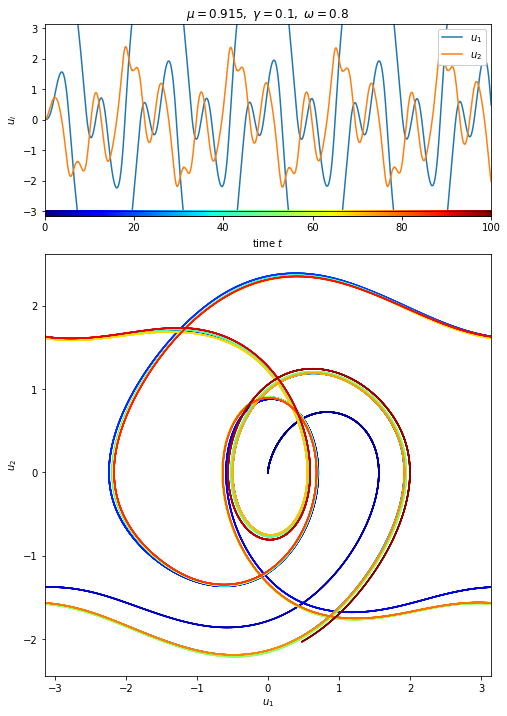

In [4]:
sim_pendulum((.915, .1, .8), t_stop=100.)

### b)

(0.0, 20000.0)


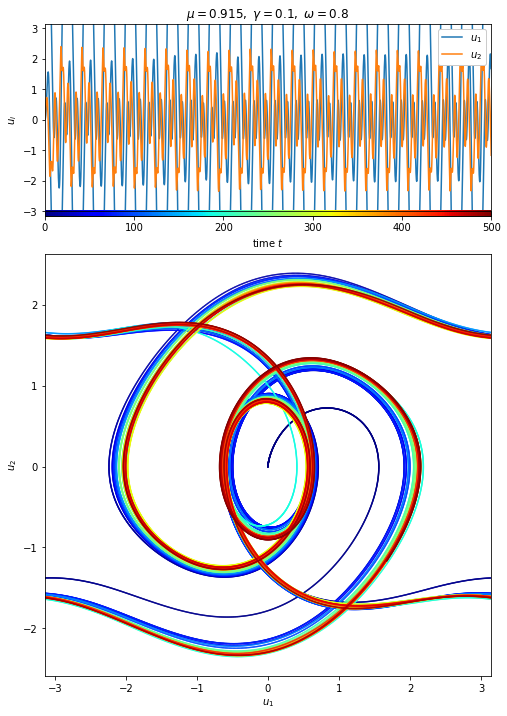

In [5]:
sim_pendulum((.915, .1, .8), t_stop=500)

#### i)
Folowing the red line, we can see that the attractor has **periodicity 3**.

#### ii)
It is hard to tell by eye, if the attractor is symmetric or not. But if we look ath the bifucation diagramm (*Figure 4.15*) we see that one attractor split into to for a slightly smaller $\mu$. Therefore this attractor has a mirrored counterpard and is **not symmetric**.

### c)

We now look at different values for $\mu$ around the bifurcation point to see what happens:

(0.0, 20000.0)


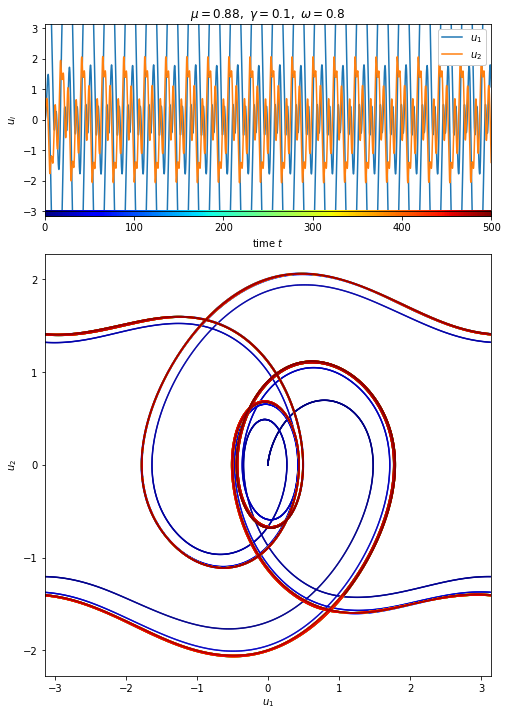

In [6]:
sim_pendulum((.88, .1, .8))

We start with $\mu = 0.88$. The trajectory is symmetric and has three intersections with the positive $u_1$-axis.

(0.0, 20000.0)


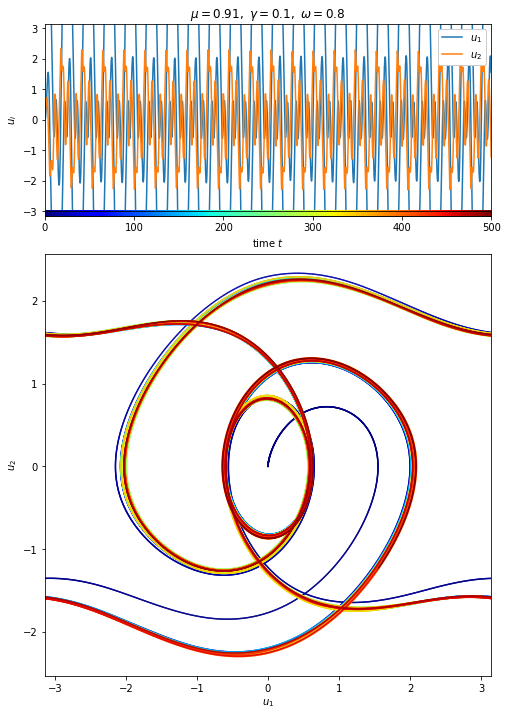

In [7]:
sim_pendulum((.91, .1, .8))

For $\mu = 0.91$ the trajectory is still symmetric, but two of the three intersections with the $u_1$-axis merged onto the same point.

(0.0, 20000.0)


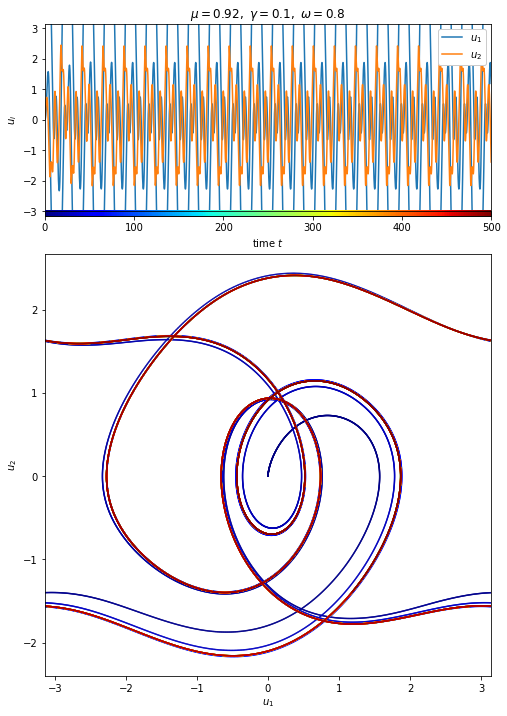

In [8]:
sim_pendulum((.92, .1, .8))

For $\mu = 9.2$, the intersection points are different again. But this time the trajectory is not symmetric anymore. If we compare the "movement" of the two intersection pairs (left and right from the origin) we see that the right pair passed through each other, while the left pair touched but moved back like they approached before.

This is the same constelation as seen in part b).